(lighting)=
# Energieeffiziente Beleuchtung einschätzen

## python konfigurieren

### Module importieren

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import holidays
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
import sys
import os
import locale
from distutils.spawn import find_executable

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 1.21.5
matplotlib 3.5.2
pandas 1.3.5
datetime <module 'datetime' from 'C:\\Users\\Genesis\\anaconda3\\envs\\workenv\\lib\\datetime.py'>
holidays 0.11.3.1
seaborn 0.11.2
plotly 5.9.0
sys 3.7.13 (default, Mar 28 2022, 08:03:21) [MSC v.1916 64 bit (AMD64)]
os <module 'os' from 'C:\\Users\\Genesis\\anaconda3\\envs\\workenv\\lib\\os.py'>
locale <module 'locale' from 'C:\\Users\\Genesis\\anaconda3\\envs\\workenv\\lib\\locale.py'>


### Grafikparameter einstellen

In [8]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

### Funktionen definieren

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für diese Einheit:</b></div>
    <ul>
        <li> Beleuchtungsqualität beschreiben </li>
        <li> mithilfe von radiometrischen Größen und Farbwiedergabe </li>
        <li> um energieeffiziente Beleuchtung zu bewerten </li>
    </ul>
</div>

## Licht als Nutzenergie

Anwendungen
- Schreibtisch
 - min. 500 lx
- Werkstatt
 - grobe Arbeiten: min. 300 lx
 - feine Arbeiten: min. 500 lx
- Bildschirm
 - ...
- ...

<br>

In [1]:
from jupyterquiz import display_quiz
from pygit2 import Repository

repository_name = Repository('.').head.shorthand  # gibt den Namen des aktuellen repo wieder

quiz_main_path = 'https://gitlab.com/oer4renewables/systemtechnik-fuer-energieeffizienz/-/raw/' + repository_name + '/files/quiz/'
quiz_name = '10_3_Energieeffiziente_Beleuchtung.json'

display_quiz(quiz_main_path + quiz_name)

### Strahlungsleistung und Strahlungsfluss

In [ ]:
c0=3e8
h=6.6e-34
k=1.38e-23
T=np.array([2600,5772])
lam=np.linspace(1e-7,15e-6,1000) # 1e-7 ungefähr Null, sonst Div durch 0
plt.figure(figsize=(12,8))

for t in T:
    E=2*np.pi*h*c0**2/((lam**5)*(np.exp(h*c0/(lam*k*t))-1))
    mx=1e6*np.nanmax(E)
    plt.plot(1e6*lam,1e6*E)
    plt.annotate(str(int(t))+' K',xy=(2898/t,mx))
plt.xlabel('Wellenlänge [um]')
plt.ylabel('Strahlungsintensität $E_{1,\lambda,schwarz}$ [W/(m2 um)]')# \n$E_{1,\lambda,schwarz}$ [W/(m2 μm)]')
plt.title("Spektrum von schwarzen Strahlern unterschiedlicher Temperatur \nnach dem Planck’schen Strahlungsgesetz ($T$ in Kelvin)"+"\n")

lamvis = np.linspace(400e-9, 750e-9, 10) # sichtbare Wellenlängen
colors = ["red", "orange", "yellow", "green", "blue", "indigo", "violet"]
for i in range(len(colors)):
   plt.plot([1e6*lamvis[i],1e6*lamvis[i]], [0,6e19], c=colors[i], lw=5, marker='.')
plt.text(1.2*1e6*lamvis[-1],5e19,'sichtbares \nLicht')
plt.text(1,7e19,'Sonne')
lamIRsens = np.linspace(7.5e-6,14e-6,2) # Messbereich Infrarotkamera FLIR
from matplotlib.patches import Rectangle
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((1e6*lamIRsens[0], 0), 1e6*(lamIRsens[-1]-lamIRsens[0]), 8e19,
                      alpha=0.3, facecolor='red'))
plt.text(1.2*1e6*lamIRsens[0],7e19,'Messbereich IR-Kamera')
plt.text(3,.2e19,'40 W Glühbirne')
plt.grid()
plt.show()

Weitere Temperaturen für andere Leuchtmittel enthält {cite:p}`wikipedia_farbtemperatur_2020`.

**Strahlungsleistung $\Phi_e$** = gesamte elektromagnetische Strahlungsleistung, die auf eine Oberfläche auftritt oder von einer Quelle (z. B. Glühbirne, Leuchtdiode) emittiert wird oder von einer Fläche reflektiert wird, Einheit $[\Phi_e] =\text{W}$

**Isotrope Lichtquelle**: strahlt gleichmäßig in alle Richtungen

**Strahlungsleistung (=Strahlungsfluss)**: gesamte abgegebene Strahlung, nicht bezogen auf Richtung oder spektrale Verteilung (Farbe)

**Bestrahlungsstärke $E_e=\frac{d\Phi_e}{dA}$**: bezieht sich auf eine beliebige Empfängerfläche $A$ im Raum, Einheit $[E_e]=\text{W/m}^2$

### Photometrische Größen

**Photometrisch: Beleuchtungsstärke $E_{\lambda} = \frac{d\Phi_{\lambda}}{dA}$**, $[E_{\lambda}] = \text{lx}$

Gewichtung von radiometrischen Größen mit einer Kurve $V(\lambda)$, die die Empfindlichkeit des menschlichen Auges beinhaltet, ergibt photometrische Größen

**Lichtstrom $\Phi_{\lambda} = K_m \cdot \int_{\lambda=380\text{ nm}}^{780\text{ nm}}\Phi_e(\lambda)\cdot V(\lambda)\cdot d\lambda$**: korrespondiert mit der radiometrischen Größe Strahlungsfluss, Lichtwellenlänge $\lambda$, Konstante $K_m = 683\text{ lm/W}$, Einheit Lumen (lm)

**Umrechnung bei monochromatischem Licht**: bei Licht mit $\lambda = 555\text{ nm}$ entspricht eine Strahlungsleistung von $\Phi_e = 1\text{ W}$ einem Lichtstrom von $\Phi_{\lambda} = 683\text{ lm}$

### Spektrale Hellempfindlichkeit $V(\lambda)$ des menschlichen Auges (Werte aus DIN 5031-3)

<a title="HHahn, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:V-lambda-phot-scot.svg"><img width="512" alt="V-lambda-phot-scot" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/V-lambda-phot-scot.svg/512px-V-lambda-phot-scot.svg.png"></a>

### Farbwiedergabeindex $R_a$ bzw. *Color Rendering Index (CRI)*

Welches Leuchtmittel hat das folgende Spektrum?

<a title="Jan Koopstra at Dutch Wikipedia, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Bulb_spectre.png"><img width="350" alt="Bulb spectre" src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Bulb_spectre.png"></a>

Zum Vergleich das Spektrum einer Leuchtstoffröhre:

<a title="Gerben49, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:CFL875_CRI82.png"><img width="350" alt="CFL875 CRI82" src="https://upload.wikimedia.org/wikipedia/commons/a/a6/CFL875_CRI82.png"></a>

Was fällt bei den beiden Bildern auf https://www.licht.de/de/grundlagen/beleuchtungsqualitaet/farbwiedergabe/ {cite:p}`lichtde_farbwiedergabe_2020` auf?

### Vorgaben für Farbwiedergabeindex $R_a$

<a title="Chris828, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:DIN_Test_6169.svg"><img width="512" alt="DIN Test 6169" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/DIN_Test_6169.svg/512px-DIN_Test_6169.svg.png"></a>

gewichtete Berechnung des $R_a$ anhand der Testfarben $\to$ gute Werte trotz schwachem Rot möglich!

Was ist mit biologischen Lichtwirkungen? Was besagt der Begriff HCL (human centric lighting)?

<div class="admonition seealso" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>Video (Dauer ca. 5 min.):</b></div>
<a href="https://www.youtube.com/watch?v=BKQH6T1DZvI">Camping Syncs Internal Clock with Nature</a>
</div>

<div class="admonition seealso" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>Weiterführende Literatur:</b></div>
{cite:p}`wosnitza_energieeffizienz_2012`
</div>

## Anforderungen an Beleuchtung: Beleuchtungsfunktionen

- Wohlbefinden vermitteln durch Sehkomfort
- Sehleistung auch unter schwierigen Umständen und über längere Zeit sicherstellen

**Daraus ergeben sich Gütemerkmale der Lichttechnik**: 
- **Beleuchtungsstärke $E_{\lambda} (\text{lx})$**, Leuchtdichteverteilung
- Begrenzung der Blendung, Lichtrichtung
- Schatten, **Lichtfarbe**
- Farbwiedergabe der Lampen

**Beleuchtete Gegenstände reflektieren Licht, entsprechend ihrer Farbe.**

**Anwendung z. B. Beleuchtung mit blauem Licht in öffentl. Toiletten** {cite:p}`katja_rudolph_mit_2015`: Da rotes Licht fehlt, sieht man zwar die Toilette, das Waschbecken, etc., aber nicht den Kontrast zwischen den Venen und der Haut - so werden die Toiletten für Junkies unattraktiver.

**Weißes Licht**: 
- Warmweißes Licht: gemütlich, behaglich
- Neutralweißes Licht: Erzeugung sachlicher Stimmung ($\to$ Büro)
- Tageslichtweißes Licht: ab $\geq 1000\text{ lx}$

## Energieeffiziente Beleuchtung

<div class="admonition seealso" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>Video (Dauer ca. 6 min.):</b></div>
<a href="https://www.youtube.com/watch?v=dd82jaztFIo">Losing the Dark - Flat Screen Version</a>
</div>

**Kennzahl Lichtausbeute**
\begin{equation}
\eta_{\text{Licht}} = \frac{\Phi_{\lambda}}{P_{\text{elektr.}}} = \frac{\text{Lichtstrom (lm)}}{\text{elektrische Leistung (W)}}    
\end{equation}

**Lebensdauer**: **Kriterium für "end of life" (EOL): Mindestlichtstrom unterschritten**

- **Glühlampen**: 1.000 {cite:p}`wosnitza_energieeffizienz_2012` Betriebsstunden (seit Phoebuskartell 1920er Jahre {cite:p}`anna-lena_gutberlet_geplante_2017`, siehe auch empfehlenswerter Film "Kaufen für die Müllhalde" {cite:p}`wikipedia_kaufen_2020`)
- **Halogenlampen**: 4.000 Betriebsstunden {cite:p}`wosnitza_energieeffizienz_2012`
- **Energiesparlampen** mit integriertem elektronischen Vorschaltgerät (EVG) 15.000 Betriebsstunden {cite:p}`wosnitza_energieeffizienz_2012`
- **LED-Lampen** (LED = light emitting diode): 50.000 Betriebsstunden {cite:p}`wosnitza_energieeffizienz_2012`

## Alterung, z. B. Degradation der Leuchtdichte bei LEDs

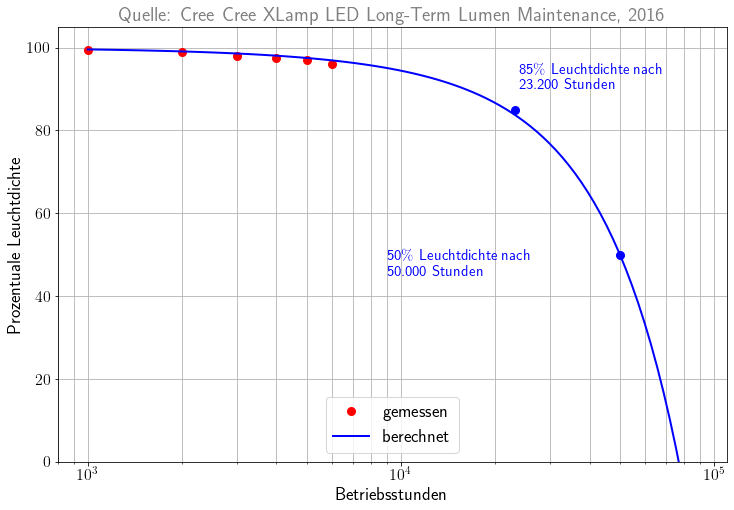

In [11]:
luminousflux_meas = [99.5, 99, 98, 97.5, 97, 96]
hours_meas = [1000, 2000, 3000, 4000, 5000, 6000]
hours_sim = np.geomspace(1000,100000,100)
luminousflux_sim = 100*(1-0.45*hours_sim/np.max(hours_sim)-1.1*hours_sim**2/np.max(hours_sim)**2)
plt.figure(figsize=(12,8))
plt.axis([.8e3,1.1e5,0,105])
plt.semilogx(hours_meas, luminousflux_meas,'ro', label='gemessen')
plt.semilogx(hours_sim, luminousflux_sim, 'b-', label='berechnet')
plt.text(23800,90,'85$\%$ Leuchtdichte nach \n23.200 Stunden',color='blue', fontsize='15')
plt.semilogx(23200,85,'bo')
plt.text(9000,45,'50$\%$ Leuchtdichte nach \n50.000 Stunden',color='blue',fontsize='15')
plt.semilogx(50000,50,'bo')
plt.xlabel('Betriebsstunden')
plt.ylabel('Prozentuale Leuchtdichte')
plt.grid(which='both')
plt.legend(loc='lower center')
plt.title('Quelle: Cree Cree XLamp LED Long-Term Lumen Maintenance, 2016',color='gray')
plt.show()

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Nach wie vielen Jahren hat sich die Leuchtdichte um 10% bzw. um 20% verringert? Warum werden die letzten Werte nur berechnet und nicht durch Test ermittelt?
</div>

*Antwort:*...

## Sankey-Diagramm einer Leuchtstofflampe

<a title="Wtshymanski at English Wikipedia, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Fluorescent_Energy.svg"><img width="512" alt="Fluorescent Energy" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Fluorescent_Energy.svg/512px-Fluorescent_Energy.svg.png"></a>

## Lichtplanung

- Schattenwurf, Oberflächenfarben und Oberflächenreflektionseigenschaften sowie Lampenfarbe und Leuchtprofil ergeben eine geometrische Planungsaufgabe, die mit CAD-Software gelöst wird
- kostenlos erhältlich z. B. relux und dialux
- in diese Programme lädt man die Lampendateien (der Lampenhersteller) und die Raumpläne und kann dann die zu erwartende Beleuchtungsqualität simulieren

## Lichtplanungsbeispiele und deren Eignung für Energieeffizienzmaßnahmen

<a title="Scorpio et. al.: Straße in Neapel mit verschiedener Beleuchtung, CC BY 4.0 &lt;https://creativecommons.org/licenses/by/4.0&gt" href="https://www.mdpi.com/energies/energies-13-03809/article_deploy/html/images/energies-13-03809-g002a-550.jpg"><img width="400" alt="Straße in Neapel mit unterschiedlicher Beleuchtung aus Scorpio et.al." src="https://www.mdpi.com/energies/energies-13-03809/article_deploy/html/images/energies-13-03809-g002a-550.jpg"></a> <br>
Beispiel von {cite:p}`scorpio_virtual_2020`

Welche Auswirkungen könnte eine Energie-Effizienz-Optimierung haben, vorteilhaft und nachteilhaft?

```{bibliography}
:filter: docname in docnames
```